# A Data Science Project: Wine Recommender System

                                                                          Laura Álvarez Mon, Junio 2019

This project includes the following phases:
- Business understanding
- Data acquisition
- Data preparation
- Modeling
- Evalutation

<img src=https://www.sv-europe.com/wp-content/uploads/2013/12/newcrispdiagram.gif style="width:300px;height:300px"/>

## 1. Business understanding

The goal is to build a wine recommender system.

### Install and import libraries

We decide to use Python for our project.

Before starting, we install and import the libraries that we will need.

In [272]:
#!pip install fuzzywuzzy

In [273]:
#!pip install beautifulsoup4

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib.request
import time
import re
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## 2. Data acquisition

The first phase is 'Data acquisition'.
We extract the data from the website 'https://labodega.consum.es' using BeautifulSoup.

Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

This is the process followed:
- Create a DataFrame called 'links'.
- Create a DataFrame called 'wines'.

LINKS:
- Set the URL with all the wines: 'catalog_link', connect to the URL, parse HTML and save BeautifulSoup object.
- Download data 'product_link' and 'image_link'.
- Download images and save them in the folder 'Images'.
- Write the DataFrame 'links'.

WINES:
- Set the URL with each wine: 'product_link' saved in 'links', connect to the URL, parse HTML and save BeautifulSoup object.
- Download data 'Wine_Id', 'Name', 'Type', 'DO', 'Size', 'Grape', 'Ageing', 'Sight', 'Smell', 'Taste' and 'Pairing'.
- Write the DataFrame 'wines'.

In [275]:
links = pd.DataFrame(columns =('Wine_Id', 'product_link', 'image_link'))
wines = pd.DataFrame(columns =('Wine_Id', 'Name', 'Type', 'DO', 'Size', 'Grape', 'Ageing', 'Sight', 'Smell', 'Taste', 'Pairing'))

# LINKS:

link = 'https://labodega.consum.es' 

# Set the URL to webscrape from
catalog_link = link + '/catalogo'

# Connect to the URL
response = requests.get(catalog_link)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

# Download data

i = 0

Prods = soup.findAll('div', attrs={'class' : 'winebox__image'})

for prod in Prods:
    
    # product_link
    product_link = link + prod.find('a')['href']
    
    # image_link
    image_name = str(i) + '_' + prod.find('img')['alt']
    image_link = link + prod.find('img')['data-src']
    
    with open('./Images/'+image_name+'.png', 'wb') as img_handle:
        img_data = requests.get(image_link)
        img_handle.write(img_data.content)
        
    # write dataframe
    links.loc[i] = (i , product_link, image_link)   

    # WINES:
    
    # Connect to the URL
    response = requests.get(product_link)

    # Parse HTML and save to BeautifulSoup object¶
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Download data and write dataframe

    wines.loc[i, 'Wine_Id'] = i
    
    wines.loc[i, 'Name'] = soup.findAll('div', {'class': 'wine-big-photo'})[0].find('img')['alt'] # name

    wines.loc[i, 'Type'] = soup.findAll('img', attrs={'class' : 'product-ico__type'})[0]['alt'] # type
    
    DO = soup.findAll('a', attrs={'class' : 'wine-pre'}) # DO
    if len(DO) == 0:
        wines.loc[i, 'DO'] = None
    else: 
        wines.loc[i, 'DO'] = DO[0].getText() 

    wines.loc[i, 'Size'] = soup.findAll('span', {'class': 'product-ico__size'})[0].getText() # size

    grapes = soup.findAll('a', attrs={'class' : 'button-tag'}) # grape
    for j in range(0,len(grapes)):
        if j == 0:
            Str = grapes[j].getText()
        else:
            Str = Str + ',' + grapes[j].getText()
    wines.loc[i, 'Grape'] = Str

    Props = soup.findAll('div', attrs={'class' : 'wine-tag-row'}) # props
    wines.loc[i, ['Ageing', 'Sight', 'Smell', 'Taste', 'Pairing']] = [Props[0].find('dd').getText(),Props[1].find('dd').getText(),Props[2].find('dd').getText(),Props[3].find('dd').getText(),Props[4].find('dd').getText()]

    i = i + 1
    
time.sleep(1) # pause the code for a sec

- Visualize data

In [276]:
links.head(3)

,Wine_Id,product_link,image_link
0,0,https://labodega.consum.es/montesierra,https://labodega.consum.es/public/Image/2017/1...
1,1,https://labodega.consum.es/tintos/faustinovii-...,https://labodega.consum.es/public/Image/2018/3...
2,2,https://labodega.consum.es/tintos/claretdetard...,https://labodega.consum.es/public/Image/2018/3...


In [277]:
wines.head(3)

,Wine_Id,Name,Type,DO,Size,Grape,Ageing,Sight,Smell,Taste,Pairing
0,0,Montesierra,Tintos,D.O Somontano,,"Cabernet sauvignon,Merlot,Tempranillo",Sin crianza,Cereza picota,"Aroma frescos a grosella negra, cerezas y menta","Carnoso, jugoso y con mucho sabor","Pastas, legumbres, tapas, quesos y embutidos"
1,1,Vino Faustino VII,Tintos,D.O Rioja,"0,187L",Tempranillo,6 meses en barrica de roble americano,Rojo picota brillante con evolución a granate,"Agradable, frutos rojos y toque dulce por el p...","Fresco y elegante, notas frutales y barrica","Carnes, patatas a la brasa, pescados y marisco..."
2,2,Vino Claret de Tardor,Tintos,D.O Empordà,"0,75L","Cabernet sauvignon,Garnacha",Sin crianza,Rojo guinda brillante con reflejos violáceos,Fruta roja y aromas de crianza,"Ligero, agradable y equilibrado con acidez ref...","Arroces, entrantes, pastas, jamón, embutidos"


- Export data to csv

In [278]:
links.to_csv('./Data/Links.csv', index = False)
wines.to_csv('./Data/Wines.csv', index = False)

- Read data from csv

In [279]:
links = pd.read_csv('./Data/Links.csv', usecols=['Wine_Id', 'product_link', 'image_link'])
wines = pd.read_csv('./Data/Wines.csv',
                    usecols=['Wine_Id','Name','Type','DO','Grape','Ageing','Sight','Smell','Taste','Pairing'])

## 3. Data understanding

### DataFrame links

In [280]:
print('The data product_link is the URL of the wine.')
print(links.iloc[0]['product_link'])
print('The data image_link is the URL of the image.')
print(links.iloc[0]['image_link'])

The data product_link is the URL of the wine.
https://labodega.consum.es/montesierra
The data image_link is the URL of the image.
https://labodega.consum.es/public/Image/2017/10/7298821.png_normal.jpg


### DataFrame wines

In [281]:
wines[0:1]

,Wine_Id,Name,Type,DO,Grape,Ageing,Sight,Smell,Taste,Pairing
0,0,Montesierra,Tintos,D.O Somontano,"Cabernet sauvignon,Merlot,Tempranillo",Sin crianza,Cereza picota,"Aroma frescos a grosella negra, cerezas y menta","Carnoso, jugoso y con mucho sabor","Pastas, legumbres, tapas, quesos y embutidos"


## 4. Data preparation

We have a dataframe with the properties of the wines, but we need to transform these properties into categorical.

This transformation can be classified into three types:
- Transformation type 01, features in groups ['Type', 'DO', 'Grape']: Selecting distinct values.
- Transformation type 02, features in groups ['Sight', 'Smell', 'Taste']: Identifying family of words
- Transformation type 03, features in group ['Ageing']: Preprocessing with Excel
        

### Fill na values and drop duplicates

Well, first we fill na values and drop duplicates.

In [282]:
wines.fillna(value = 'Desconocido', inplace = True)

In [283]:
print(wines.shape,
wines.drop_duplicates(['Name', 'Type', 'DO', 'Grape', 'Ageing', 'Sight', 'Smell', 'Taste', 'Pairing']).shape)

(370, 10) (366, 10)


### Define function FamilyOfWords

Define function called FamilyOfWords that we use to transform features in group ['Sight', 'Smell', 'Taste'] (Transformation type 02).

This function...
- Select features of a group in the dataframe wines.
- Build vocabulary with CountVectorizer.
(from sklearn.feature_extraction.text import CountVectorizer)
- And measures the similarity between words to find words from the same semantic field using fuzz.partial_ratio.
(from fuzzywuzzy import fuzz, from fuzzywuzzy import process)

Define 'stop' used in the parameter stop_words of CountVectorizer.

In [284]:
prep = ['a', 'ante', 'bajo', 'cabe', 'con','contra', 'de','desde','en','entre','hacia','hasta','para','por','según','sin','sobre', 'tras', 'durante', 'mediante']
nex = ['y', 'e', 'o', 'u', 'que']
art = ['del', 'al', 'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unos']
gen = ['es','tan','gran', 'muy','medio', 'media', 'ligero', 'ligera', 'ligeros', 'ligera', 'bien', 'buen','bueno', 'buena', 'lleno','final', 'tono', 'tonos', 'tonalidad', 'tonalidades', 'matices', 'rico','sabor', 'sabores', 'aroma', 'aromas']
stop = prep + nex + art + gen
print(stop)

['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por', 'según', 'sin', 'sobre', 'tras', 'durante', 'mediante', 'y', 'e', 'o', 'u', 'que', 'del', 'al', 'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unos', 'es', 'tan', 'gran', 'muy', 'medio', 'media', 'ligero', 'ligera', 'ligeros', 'ligera', 'bien', 'buen', 'bueno', 'buena', 'lleno', 'final', 'tono', 'tonos', 'tonalidad', 'tonalidades', 'matices', 'rico', 'sabor', 'sabores', 'aroma', 'aromas']


In [285]:
def FamilyOfWords(Group, f, g):
    """
    Select features of a group in the dataframe wines, build vocabulary and measures the similarity between words to find words from the same semantic field.
    
    :Group: 'Sight', 'Smell' or 'Taste'
    
    :f: f is the 'min_df' parameter of 'CountVectorizer' function.
    When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
    
    :g: If two words have a similarity > g, they are put in the same FamilyOfWords. 
    FuzzyWuzzy is a library of Python which is used for string matching.
    The function 'fuzz.partial_ratio' returns the ratio of the most similar substring as a number between 0 and 100.
    
    """
    text = wines[Group][:]
    vectorizer = CountVectorizer(stop_words=stop,min_df=f) # transformation
    vectorizer.fit(text) # tokenizer and build vocabulary
    Text = np.array(list(vectorizer.vocabulary_.keys()))
    len(Text)
    
    # load a dataframe with all words and the similarity between all them
    words = pd.DataFrame(index= Text, columns=Text)
    n = words.shape[0]
    for i in range(0,n):
        for j in range(0,n):
            words.iloc[i,j] = fuzz.partial_ratio(words.columns[i], words.index[j]) #col,row
    
    # aux is a list of lists, where words in sub-lists has similarity >= g
    aux = []
    for k in words.index:
        if k in words.columns:
            l = list(words[words[k]>=g].index)
            try:
                del words[k]
            except:
                pass
            if len(l) != 1:
                for i in range(0,len(l)):
                    if l[i] in words.columns:
                        m = list(words[words[l[i]]>=g].index)
                        if len(m) != 1:
                            for j in range(0,len(m)):
                                    if m[j] in words.columns:
                                        n = list(words[words[m[j]]>=g].index)
                                        l = l + n
                                        try:
                                            del words[m[j]]
                                        except:
                                            pass
                                    else:
                                        pass
                        l = l + m
                        try:
                            del words[l[i]]
                        except:
                            pass                  
                    else:
                        pass
            aux.append(l)
        else:
            pass
        
    # drop duplicates in each list: transform to set and to list again
    for i in range(0, len(aux)):
        aux[i] = list(set(aux[i]))
    return aux

### Type, DO, Grape
Transformation type 01

In [286]:
# Type
Type =  wines.groupby('Type').sum().index.values

# DO
DO =  wines.groupby('DO').sum().index.values

# Grape
text = wines['Grape'][:]
text = text.apply(lambda x: re.sub(",", "split", x))
Grape = []
for i in range(0, len(text)):
    Grape = Grape + text[i].split("split")
Grape = np.sort(list(set(Grape))) #drop duplicates

In [287]:
print(Type[:])
print(DO[:5])
print(Grape[:5])

['Blancos' 'Desconocido' 'Ecológicos' 'Espumosos' 'Generosos' 'Rosados'
 'Tintos']
['D.O Alella' 'D.O Alicante' 'D.O Almansa' 'D.O Bierzo' 'D.O Bullas']
['Airen' 'Albariño' 'Baga' 'Barbera' 'Bobal']


### Sight, Smell, Taste
Transformation type 02

In [288]:
# Sight
Sight = FamilyOfWords('Sight',2,90)

# Smell
Smell = FamilyOfWords('Smell', 3,90)

# Taste
Taste = FamilyOfWords('Taste', 3,85)

In [289]:
print(Sight[:6])
print(Smell[:2])
print(Taste[31:35])

[['cereza'], ['picota'], ['rojo'], ['brillante'], ['evolución'], ['granates', 'granate']]
[['frescos', 'fresco'], ['negras', 'negra']]
[['tostado'], ['redondos', 'redondo'], ['expresión'], ['tánica']]


### Ageing
Transformation type 03

In [290]:
Ageing_data = pd.read_csv('./Data/Ageing.txt', sep = ';', decimal = ',' ).T
Ageing = Ageing_data.index

In [291]:
print(Ageing)
# 'AME' is roble americano, and 'FRA' is roble francés
# 'BAMxx' is xx meses en barrica, and 'BOxx' is xx meses in botella

Index(['SIN_CRIANZA', 'LIAS', 'BOTAS', 'SOLERAS', 'DIA_ACERO', 'MES_ACERO',
       'BARRICA', 'ROBLE', 'AME', 'FRA', 'BOTELLA', 'BAM01', 'BAM02', 'BAM03',
       'BAM04', 'BAM05', 'BAM06', 'BAM07', 'BAM08', 'BAM09', 'BAM10', 'BAM11',
       'BAM12', 'BAM14', 'BAM18', 'BAM24', 'BAM36', 'BOM01', 'BOM02', 'BOM03',
       'BOM04', 'BOM05', 'BOM06', 'BOM07', 'BOM08', 'BOM09', 'BOM10', 'BOM11',
       'BOM12', 'BOM14', 'BOM18', 'BOM24', 'BOM36'],
      dtype='object')


### Load the DataFrame 'features'

In [292]:
features = pd.DataFrame(columns = ['Group', 'Feature', 'Family_Id', 'Feature_Id'])

k = 0
l = 0
for f in ['Type', 'DO', 'Grape']:
    for i in range(0, len(globals()[f])):
        features = features.append({'Group': f, 'Feature': globals()[f][i], 'Family_Id': k, 'Feature_Id': k}, ignore_index=True)
        k = k + 1

for f in ['Sight', 'Smell', 'Taste']:
    for i in range(0, len(globals()[f])):
        l = k
        for j in range(0,len(globals()[f][i])):
            features = features.append({'Group': f, 'Feature': globals()[f][i][j], 'Family_Id': l, 'Feature_Id': k}, ignore_index=True)
            k = k + 1
            
for i in range(0, len(Ageing)):
    features = features.append({'Group': 'Ageing', 'Feature': Ageing[i], 'Family_Id': k, 'Feature_Id': k}, ignore_index=True)
    k = k + 1

The DataFrame 'features' has the following columns:
- Group
- Features
- Family_Id
- Feature_Id

Below, you can see a sample to explain the meaning of each column.

In [293]:
features[220:231]

,Group,Feature,Family_Id,Feature_Id
220,Smell,vainilla,220,220
221,Smell,toffee,221,221
222,Smell,maduras,222,222
223,Smell,madura,222,223
224,Smell,notas,224,224
225,Smell,balsámicas,225,225
226,Smell,balsámicos,225,226
227,Smell,ciruelas,227,227
228,Smell,ciruela,227,228
229,Smell,flor,229,229


### Dictionaries

Define some dictionaries to make easy the work.

#### Feature_to_Id  //  Id_to_Feature

In [294]:
Feature_to_Id = features.set_index('Feature')['Feature_Id'].to_dict()
Id_to_Feature = features.set_index('Feature_Id')['Feature'].to_dict()

#### Id_to_Wine

In [295]:
Id_to_Wine = wines.set_index('Wine_Id')['Name'].to_dict()

#### Feature_to_N  //  Family_to_N

In [296]:
# returns the number N of different features in each group
Feature_to_N = features.groupby(by=('Group', 'Feature_Id')).count().groupby(by='Group').count()['Feature'].to_dict()

# returns the number N of different families in each group
Family_to_N = features.groupby(by=('Group', 'Family_Id')).count().groupby(by='Group').count()['Feature'].to_dict()

You can check how the value returned in Feature_to_N is equal to the value Family_to_N in the groups: Type, DO, Grape, Ageing.

However, it is not equal in the groups: Sight, Smell, Taste. Because the function FamilyOfWords was used.

#### Family_to_Weight

Although finally this is not used, it is considered to associate weights to the families.

In [297]:
Family_to_Weight = {'Type': 100/Family_to_N['Type'],
                    'DO': 100/Family_to_N['DO'],
                    'Grape': 100/Family_to_N['Grape'],
                    'Sight': 100/Family_to_N['Sight'],
                    'Smell': 100/Family_to_N['Smell'],
                    'Taste': 100/Family_to_N['Taste'],
                    'Ageing': 100/Family_to_N['Ageing']}
Family_to_Weight = {'Type': 1,'DO': 1,'Grape': 1,'Sight': 1,'Smell': 1,'Taste': 1,'Ageing': 1}

### Load the DataFrame 'wines_features'

In [298]:
wines_features = pd.DataFrame(columns=wines['Wine_Id'])
s = 0
for f in ['Type','DO','Grape','Sight','Smell','Taste']:
    for i in range(s, s + Feature_to_N[f]):
        wines_features = wines_features.append(wines[[f]].applymap(lambda x: Family_to_Weight[f]*int(Id_to_Feature[i].lower() in str(x).lower())).T, ignore_index = True)
        s = i + 1
        
for f in ['Ageing']:
    wines_features = wines_features.append(Ageing_data.applymap(lambda x: Family_to_Weight[f]*x), ignore_index = True)

In [299]:
wines_features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Load the DataFrame 'wines_families'

In [300]:
wines_families = pd.merge(wines_features, pd.DataFrame(features['Family_Id']), how='inner', left_index=True, right_index=True).groupby(by='Family_Id').sum()

Here the 'Preparation Data' phase. We have a dataframe with all the wines in columns, and all the properties (called families) in rows.

In [301]:
wines_families.head(3)

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
Family_Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [302]:
wines_families.to_csv('./Data/Wines_Families.csv', index=False)

## 5. Modeling

Based on the 'Collaborative filtering' model we learned in class, I have done a 'Content-based' model.

In this model, properties are used to find similar wines (as in class, users were used to find similar films).

### Load the DataFrame 'coocc'

In [303]:
coocc = wines_families.T.dot(wines_families)
coocc = coocc.applymap(lambda x: round(x))
np.fill_diagonal(coocc.values, 0)

#### Export and import

In [304]:
coocc.to_csv('./Data/Coocc.csv', index=False)
coocc = pd.read_csv('/home/dsc/Repos/TFM/Data/Coocc.csv')

#### Visualize

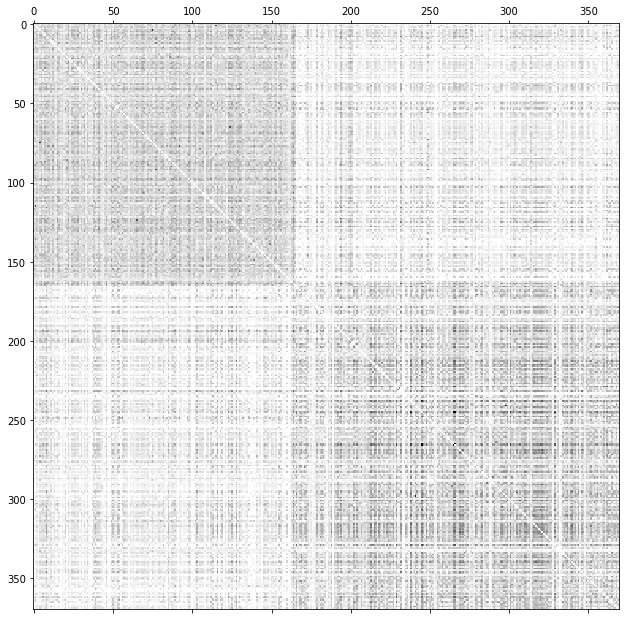

In [305]:
plt.matshow(coocc, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

### Similarity function

In [306]:
def co_occurrance_similarity(Wine_Id, coocurrance, ntop=10):
    """
    Returns the top-N most similar wines to a given one, based on the coocurrance matrix
    
    :param Wine_Id: id of input wine
    :param cooccurrance: co-occurance matrix
    :param ntop: number of wines to be retrieved
    
    :return top-N most similar wines to the given Wine_Id
    """
    coocurrance = coocurrance.sort_values(by = str(Wine_Id))
    similarwines = coocurrance[Wine_Id:][::-1]
    df = pd.DataFrame()
    df['Wine_Id'] = similarwines.iloc[0:ntop][str(Wine_Id)].index
    df['Value'] = similarwines.iloc[0:ntop][str(Wine_Id)].values
    df.sort_values(by='Value', ascending=False, inplace=True)
    return np.array(df)

In [307]:
co_occurrance_similarity(150,coocc,5)

array([[ 5, 20],
       [98, 18],
       [38, 16],
       [72, 16],
       [92, 15]])

### Recommendation function

In [308]:
def co_occurrance_recommendation(items_id, cooccurrance, ntop=5):
    """
    Obtain the list of ntop recommendations based on a list of wines
    
    :param items_id: list of wines ids
    :param coocurrence: co-ocurrence matrix
    :param ntop: top-K wines to be retrieved
    
    :return list of ntop wines recommended
    """
    # another (row wise)
    list_sim_items = np.vstack([co_occurrance_similarity(id_, cooccurrance, ntop*10) for id_ in items_id])
    # Group by id and take the maximum frequency to remove duplicates
    largest_freq = pd.DataFrame(list_sim_items, columns=['id', 'freq']).groupby('id').agg(max).reset_index()
    # remove wines itself
    largest_freq = largest_freq[~largest_freq['id'].isin(items_id)] 
    # sort by value in descending order
    sorted_list = largest_freq.sort_values(by='freq', ascending=False)
    # get the top N
    out = sorted_list.values[:ntop, 0]
    return out

In [309]:
co_occurrance_recommendation([150,5], coocc, 5)

array([ 98,  51, 131, 112,  88])

In [310]:
a = [150,5]
b = list(co_occurrance_recommendation(a,coocc,5))
wines[wines['Wine_Id'].isin(a)].append(wines[wines['Wine_Id'].isin(b)])

,Wine_Id,Name,Type,DO,Grape,Ageing,Sight,Smell,Taste,Pairing
5,5,Vino Reina Elionor,Tintos,D.O Terra Alta,"Mazuelo,Tempranillo,Garnacha",12 meses en barrica de roble,Rojo rubí intenso,"Frutas rojas maduras, confituras y notas balsá...","Armonioso, intenso, equilibrado con postgusto ...","Carnes, quesos"
150,150,Vino Roureda,Tintos,D.O Tarragona,"Mazuelo,Tempranillo,Garnacha",12 meses en barrica de roble,Rojo rubí,Frutas maduras y notas especiadas,"Suave, equilibrado y potente","Carnes rojas, caza, guisos, quesos"
51,51,Vino Melior,Tintos,D.O Ribera del Duero,Tempranillo,6 meses en barrica,Cardenal oscuro con ribete morado,"Frutas rojas maduras, regaliz, café y vainilla","Fresco, intenso y voluminoso","Carnes blancas, asados, legumbres y quesos de ..."
88,88,Vino Gran Castillo,Tintos,D.O Utiel-Requena,Bobal,Sin crianza,Rojo rubí intenso con reflejos violáceos,Frutas roja maduras,"Fresco, equilibrado y con buen paso por boca","Carnes a la plancha, pescados en salsa, arroce..."
98,98,Tinto selección Marqués del Atrio,Tintos,D.O Rioja,"Tempranillo,Graciano","6 meses en barrica de roble americano y uno, d...",Rojo rubí brillante de intensidad media-alta,Aromas a frutas rojas maduras con elegantes to...,Equilibrado en boca con un largo y elegante po...,"Ideal para todas clases de carnes, pastas, tap..."
112,112,Con un par,Tintos,D.O Valencia,"Monastrell,Petit verdot",Sin crianza,Rojo amoratado vivo y brillante,Aromas a frutas rojas confitadas y toques de e...,Potente y de gran personalidad. Bien estructur...,"Arroces, pastas, verduras, pollo, carnes rojas..."
131,131,Vino Lagunilla,Tintos,D.O Rioja,"Tempranillo,Garnacha","12 meses en depósito para su estabilización, l...",Cereza oscuro,"Aromas terrosos, frutas rojas y especias",Redondo y potente con postgusto persistente,"Asados, ternera, cordero, caza, pastas y salsa..."
